In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

In [4]:
df = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'), download_if_missing=True)
texts = df.data
labels = df.target
target_names = df.target_names


In [7]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_vec = vectorizer.fit_transform(texts)
print("Shape of raw TF-IDF matrix:", X_vec.shape)


Shape of raw TF-IDF matrix: (18846, 5000)


In [8]:
svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(X_vec)
print("Shape after applying SVD:", X_svd.shape)


Shape after applying SVD: (18846, 2)


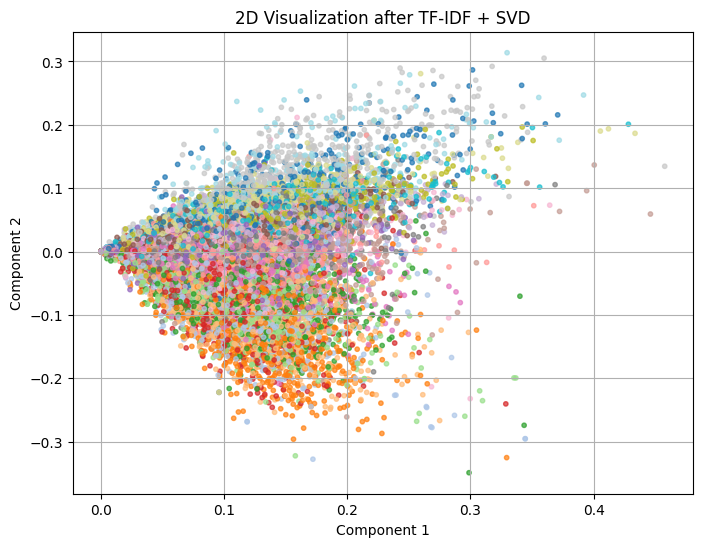

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=labels, cmap='tab20', s=10, alpha=0.7)
plt.title("2D Visualization after TF-IDF + SVD")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()


In [13]:
num_clusters = 20
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X_svd)
df['Cluster'] = clusters
sil_score = silhouette_score(X_svd, clusters)
print("Silhouette Score:", sil_score)


Silhouette Score: 0.33992200149484725


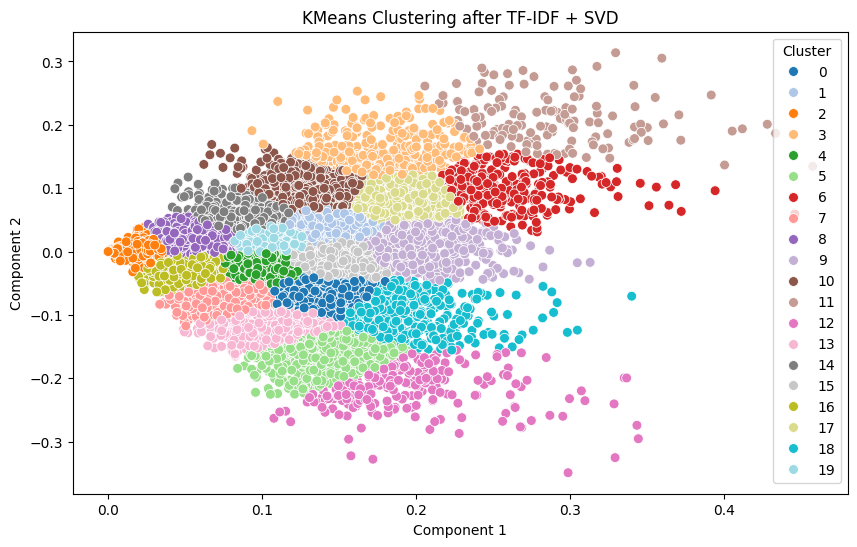

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_svd[:, 0], y=X_svd[:, 1], hue=clusters, palette='tab20', s=50)
plt.title("KMeans Clustering after TF-IDF + SVD")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(title="Cluster")
plt.show()
